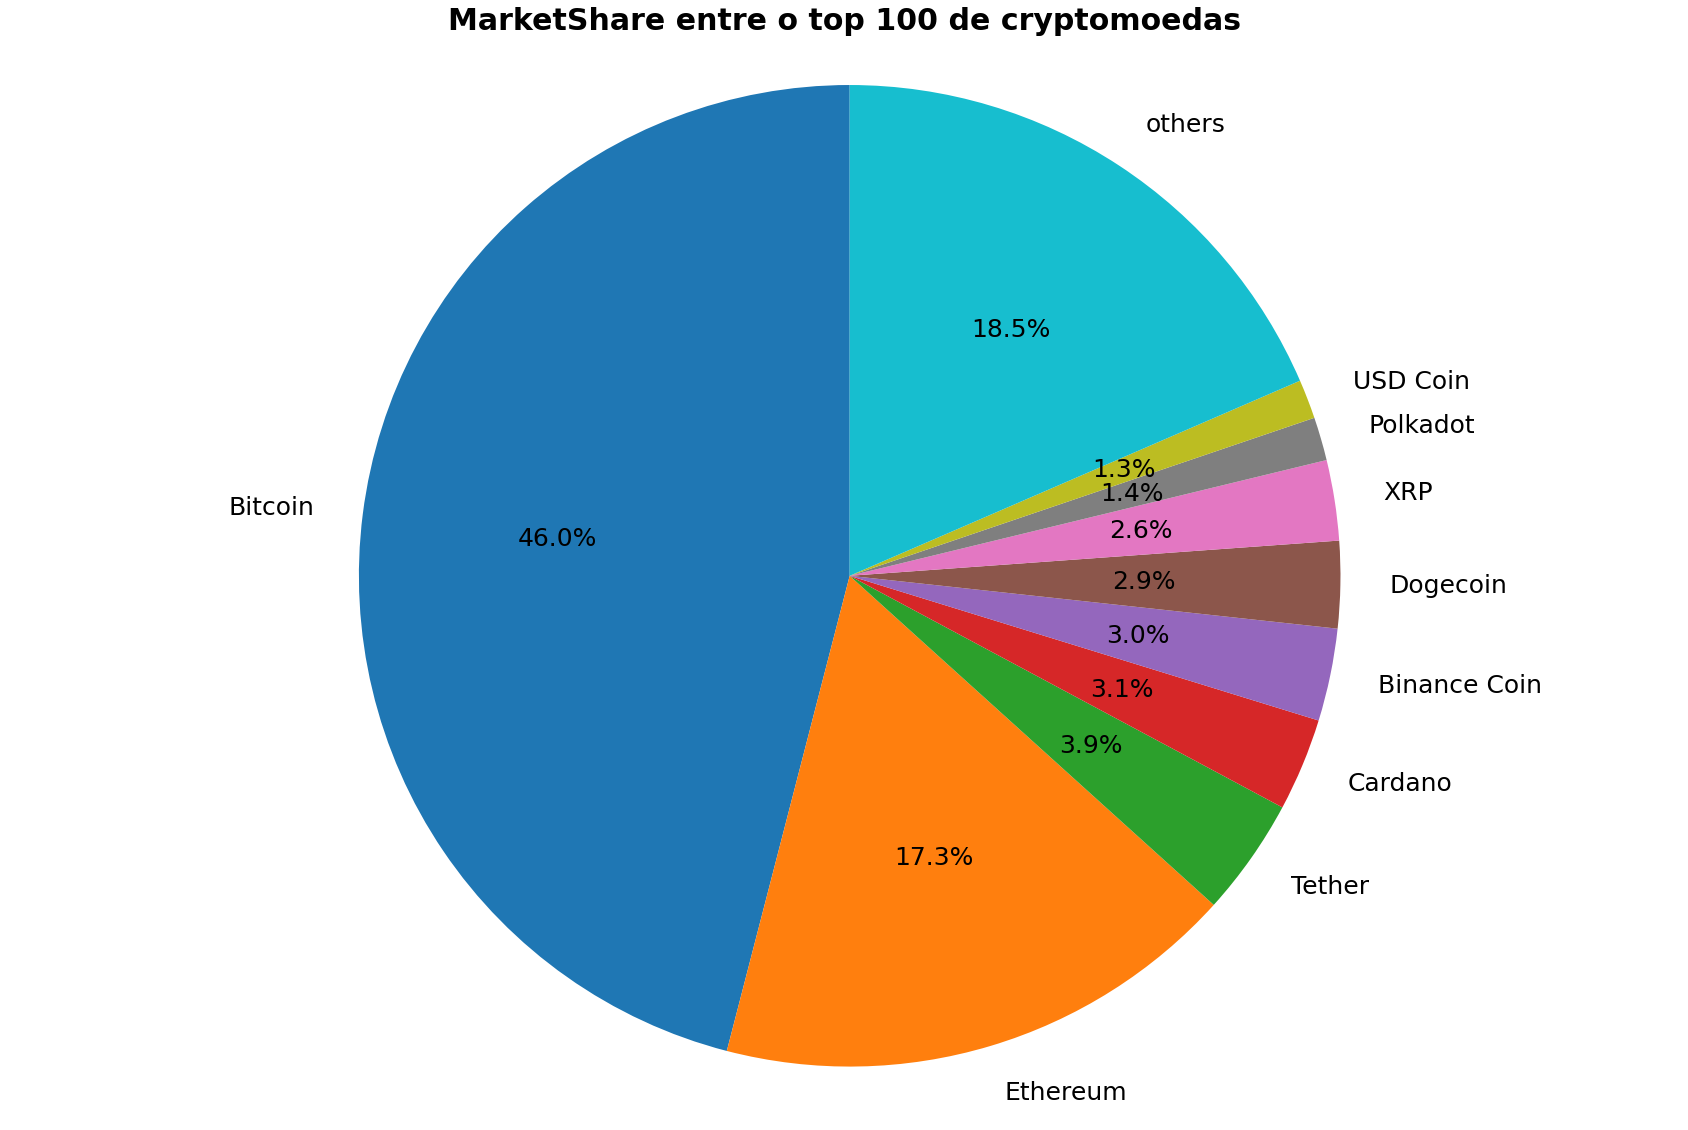

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import requests
from pylab import rcParams


#list of cryptocurrency pairs
url = 'https://api.coingecko.com/api/v3/coins/markets?vs_currency=usd&order=market_cap_desc&page=1&sparkline=false'
data = requests.get(url).json()
df = pd.DataFrame.from_dict(data)

#Remoção de colunas inúteis para o trabalho
df.drop(columns=["image", 
                 "market_cap_rank", 
                 "fully_diluted_valuation", 
                 "high_24h", 
                 "low_24h", 
                 "price_change_24h", 
                 "price_change_percentage_24h", 
                 "market_cap_change_24h", 
                 "market_cap_change_percentage_24h", 
                 "circulating_supply", 
                 "total_supply", 
                 "max_supply", 
                 "ath", 
                 "roi",
                 "ath_change_percentage",
                 "ath_date", 
                 "last_updated", 
                 "atl", 
                 "atl_change_percentage", 
                 "id",
                 "symbol",
                 "atl_date"], 
        inplace=True)

df_marketshare250 = df.tail(91)
others = df_marketshare250["market_cap"].sum()
df = df.head(9)
new_row = {"name":"others", 
           "market_cap":others}
df = df.append(new_row, ignore_index=True)

SumData = df["market_cap"].tolist()
Labels = df["name"].tolist()

plt.pie(SumData,
        labels=Labels,
        startangle=90,
        autopct='%1.1f%%') #Apresenta as percentagens das fatias

plt.axis('equal')
rcParams['font.size'] = 25
rcParams['figure.figsize'] = 30, 20
plt.title("MarketShare entre o top 100 de cryptomoedas", font = {'family' : 'sans-serif',
                                                                 'weight' : 'bold',
                                                                 'size'   : 30})
#plt.legend(loc="lower right")
plt.show()